In [68]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


def download_page():
    """
    This function downloads a web page and returns the response.
    """
    # Send a request to the website
    url_base = "https://qatarsale.com/en/products/cars_for_sale"
    url_list = [url_base + "?page=" + str(x) for x in range(1, 15)]

    car_sale_df = pd.DataFrame()

    for i in url_list:

        response = requests.get(i)
        # Send a request to the website
         # Check if the request was successful
        if response.status_code != 200:
            print("Failed to download page {}".format(i))
            return None

        # Parse the HTML response
        soup = BeautifulSoup(response.text, "html.parser")

        # Find all the car listings on the page
        car_listings = soup.find_all("div", class_="product-list")

        # Iterate over each car listing
        titles = car_listings[0].find_all("a", class_="product-details")
        prices = car_listings[0].find_all("div", class_="product-price-info")
        parameters = car_listings[0].find_all("a", class_="product-definitions")

        titles_list = [titles[x] for x in range(0,len(titles),2)]

        data = []

        for title, price, parameter in zip(titles_list, prices, parameters):

            parameter_list = parameter.find_all("span", class_="def-value")

            # Print the title and price 
            data.append({"car type": title.text.strip(),
                        "price": price.text.strip().replace(' Q.R','').replace(',',''),
                        "mileage": parameter_list[0].text.strip().replace(' Km','').replace(',',''),
                        "gear_type": parameter_list[1].text.strip(),
                        "year": parameter_list[2].text.strip(),
                        "cynlinder": parameter_list[3].text.strip(),              
                        })

        page_df = pd.DataFrame(data)
        car_sale_df = pd.concat([car_sale_df, page_df])



    return car_sale_df



In [69]:
car_sale_df = download_page()

In [78]:
car_sale_df

,car type,price,mileage,gear_type,year,cynlinder
0,Toyota Land Cruiser VXR,135000.0,152000.0,Automatic,2015,8
1,Toyota Land Cruiser VX Twin Turbo,335000.0,27000.0,Automatic,2022,6
2,Toyota Land Cruiser VX Twin Turbo,360000.0,0.0,Automatic,2022,6
3,Land Rover Defender 110,599000.0,1200.0,Automatic,2023,8
4,Mercedes-Benz G-Class 63 AMG,610000.0,75000.0,Automatic,2020,8
...,...,...,...,...,...,...
19,Toyota Hilux SR5,87000.0,2500.0,Manual,2022,4
20,Toyota Land Cruiser GX,230000.0,16000.0,Automatic,2022,6
21,Toyota Hilux SR5,107000.0,1500.0,Automatic,2022,4
22,Toyota Land Cruiser GR Sport Twin Turbo,400000.0,11000.0,Automatic,2022,6


In [71]:
def remove_non_numeric(df, column):
    """
    This function removes non-numeric characters from a column in a dataframe.
    """
    df[column] = df[column].str.replace(r'\D+', '')
    return df

car_sale_df = remove_non_numeric(car_sale_df, "cynlinder")
car_sale_df = remove_non_numeric(car_sale_df, "year")


/tmp/ipykernel_5992/1621798845.py:5: FutureWarning:

The default value of regex will change from True to False in a future version.



In [72]:
car_sale_df= car_sale_df[~(car_sale_df['year'] == 'Automatic')]

In [73]:
car_sale_df.cynlinder.unique()

array(['8', '6', '4', '12', '0', '5'], dtype=object)

In [74]:

car_sale_df["car type"] = car_sale_df["car type"].astype('string')
car_sale_df["price"] = car_sale_df["price"].astype(float)
car_sale_df["mileage"] = car_sale_df["mileage"].astype(float)
car_sale_df["gear_type"] = car_sale_df["gear_type"].astype('string')
car_sale_df["year"] = car_sale_df["year"].astype(int)
car_sale_df["cynlinder"] = car_sale_df["cynlinder"].astype(int)


In [75]:
car_sale_df.dtypes

car type      string
price        float64
mileage      float64
gear_type     string
year           int64
cynlinder      int64
dtype: object

In [76]:
import plotly.express as px 

fig = px.scatter(car_sale_df, x="mileage", y="price", color="gear_type", size="cynlinder", hover_data=['car type', 'year']) 
fig.show()

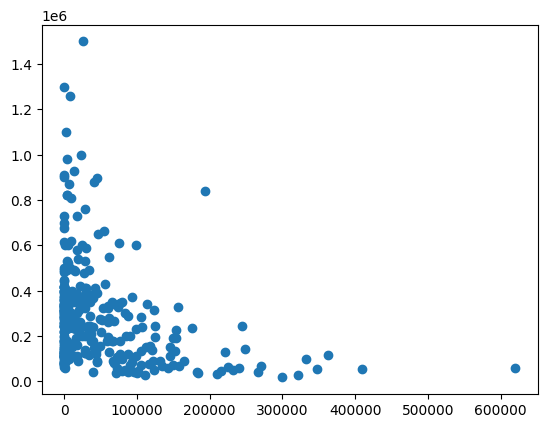

In [77]:
import matplotlib.pyplot as plt

plt.scatter(car_sale_df["mileage"], car_sale_df["price"])